In [1]:
#| default_exp ndwi_class

# NDWI 

In [2]:
#|hide
from nbdev.showdoc import *

In [7]:
#|export
import rasterio
import matplotlib.pyplot as plt 

from flood_exercise import utils_func
from flood_exercise import const_vals as CONST

In [10]:
#|export

class ndwi():

  def __init__(self,
      path_to_imgs : str , # path to the folder that contains the images
      ):
     
     # get list of tif files
     self.list_of_files = utils_func.load_list_paths(path_to_imgs,filter_file = True)

     # calculate NDWI per image

     for path in self.list_of_file:
         self.ndwi_img = self._ndwi_s2_(path)
  
     #TODO : understand what should be the output - masked image ? 
         
  def _ndwi_s2_(self ,
                     path):
         
         with rasterio.open(path) as src:
            green = src.read(CONST.GREEN_BAND)
            nir = src.read(CONST.NIR_BAND)

            ndwi = (green - nir) / (green + nir)

         return ndwi
     




C:\Users\USER\AppData\Local\Temp\ipykernel_5672\2240315112.py:21: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


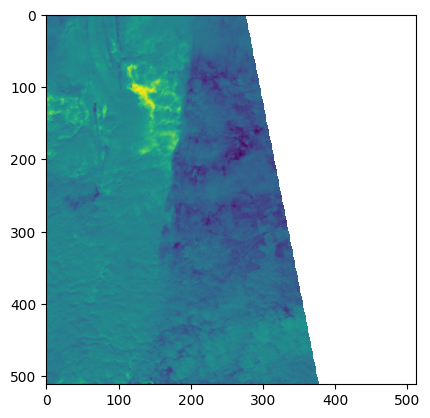

In [8]:
instance = ndwi(path_to_imgs = r'D:\git\flood_exercise\S2')
plt.imshow(instance.ndwi_img)

In [9]:
instance.ndwi_img

array([[-0.23982321, -0.23258004, -0.2361949 , ...,         nan,
                nan,         nan],
       [-0.24030648, -0.23015687, -0.22625057, ...,         nan,
                nan,         nan],
       [-0.2506938 , -0.24042455, -0.22807018, ...,         nan,
                nan,         nan],
       ...,
       [-0.21243144, -0.23432836, -0.23705104, ...,         nan,
                nan,         nan],
       [-0.21390275, -0.21731123, -0.22311577, ...,         nan,
                nan,         nan],
       [-0.20779221, -0.20340867, -0.22145651, ...,         nan,
                nan,         nan]])

In [8]:
rasterio.open(r'D:\git\flood_exercise\S2\Bolivia_60373_S2Hand.tif').read(3)

array([[   0,    0,    0, ...,  537,  537,  510],
       [   0,    0,    0, ...,  499,  499,  487],
       [   0,    0,    0, ...,  475,  475,  472],
       ...,
       [   0,    0,    0, ..., 1046, 1028, 1018],
       [   0,    0,    0, ..., 1021, 1014, 1022],
       [   0,    0,    0, ..., 1002, 1015, 1021]], dtype=int16)